In [3]:
from ankipandas import Collection 
import pandas as pd
import os
my_coll=Collection()
print("gop")    
print(type(my_coll.cards))
my_coll.cards.to_csv("cards_data.csv", encoding="utf8")
my_coll.notes.to_csv("notes_data.csv",encoding="utf8")
my_coll.cards=my_coll.cards.merge_notes()
my_coll.cards.to_csv("cards_all_data.csv",encoding="utf8")
# my_coll.cards.
    

gop
<class 'ankipandas.ankidf.AnkiDataFrame'>


                             cdeck   0_x   0_y
0                  daily knowledge  4271   8.0
1              Englisch Wortschatz  2617  84.0
2                            Kunst  1192   6.0
3   US States, Locations, Capitals   662   NaN
4                            Mathe   393   NaN
..                             ...   ...   ...
90                        Standard     2   NaN
91                       Parisisch     2   NaN
92                    MathePapers     2   NaN
93         Englisch Wortschatz Neu     2   NaN
94      japanischnichtjyoyokanjis     1   NaN

[95 rows x 3 columns]
                                                cdeck     ratio
12         japanischJapanisch - Shinjitai vs Chinese  8.247423
53            daily knowledgeAmpelregierung Minister  7.692308
51  daily knowledgeWir werden InformatikerShortc...  7.407407
61      daily knowledgeWir werden InformatikerExcel  6.666667
1                                 Englisch Wortschatz  3.209782
28     daily knowledgeWir we

c:\Users\juliu\anaconda3\envs\ankiaddon\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


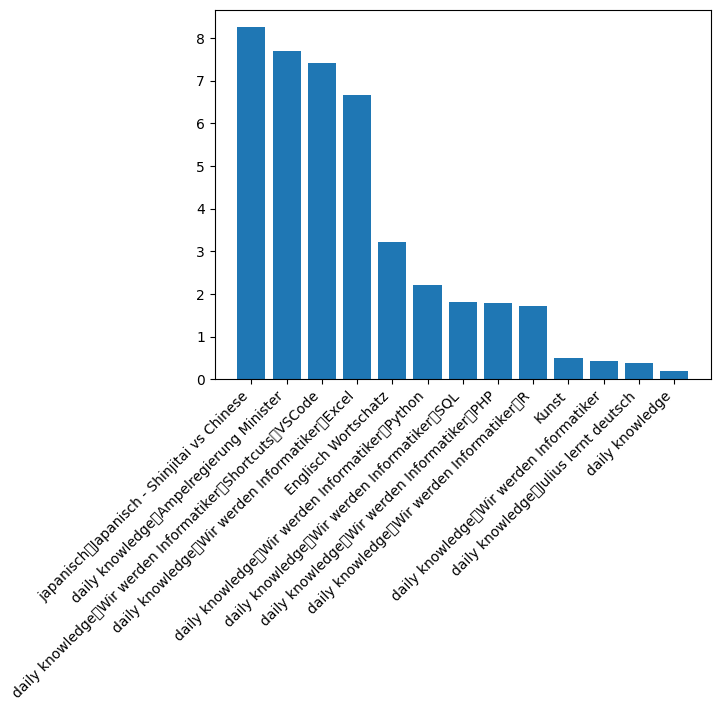

In [20]:
import matplotlib.pyplot as plt

df_cards = my_coll.cards.copy()

df_cards2 = my_coll.cards[my_coll.cards.has_tag("leech")]

count2 = df_cards2.value_counts("cdeck")
count1 = df_cards.value_counts("cdeck")

count1=count1.to_frame().reset_index()
count2=count2.to_frame().reset_index()

count1=count1.merge(count2,on="cdeck",how="left")
print(count1)
count1["ratio"]=count1["0_y"].div(count1["0_x"])*100
count1=count1.sort_values(by="ratio",ascending=False)
count1=count1[["cdeck","ratio"]]
count1=count1.dropna()
print(count1)

plt.bar(count1["cdeck"],count1["ratio"],)
plt.xticks(rotation=45, ha='right')
plt.show()
